In [5]:
import requests
import pandas as pd
from IPython.display import display

# City of Chicago Crime Data API Endpoint
API_URL = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"

# Define date range for filtering (2015 to today)
params = {
    "$limit": 5000,  # Increase limit to gather more data
    "$where": "date >= '2015-01-01T00:00:00' AND date < '2025-12-31T23:59:59'",  # Filter for 2015 - Today
    "$order": "date DESC"  # Get the most recent crimes first
}

# Fetch data from the API
response = requests.get(API_URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # Convert data to a Pandas DataFrame
    df = pd.DataFrame(data)

    # Convert date column to datetime format (if available)
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors="coerce")

    # Display the DataFrame in Jupyter Notebook / VS Code
    display(df)

else:
    print(f"Error: Unable to fetch data (Status Code: {response.status_code})")


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13748106,JJ148688,2025-02-12 00:00:00,011XX S MICHIGAN AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,4,32,26,1177419,1895604,2025,2025-02-19T15:43:45.000,41.868869436,-87.624120152,"{'latitude': '41.868869436', 'longitude': '-87..."
1,13746979,JJ147091,2025-02-12 00:00:00,038XX W FILLMORE ST,1210,DECEPTIVE PRACTICE,THEFT OF LABOR / SERVICES,APARTMENT,False,False,...,24,29,11,1150891,1895096,2025,2025-02-19T15:43:45.000,41.868035558,-87.721524277,"{'latitude': '41.868035558', 'longitude': '-87..."
2,13746813,JJ146927,2025-02-12 00:00:00,117XX S PARNELL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,21,53,08B,1174745,1827081,2025,2025-02-19T15:43:45.000,41.680894854,-87.635976831,"{'latitude': '41.680894854', 'longitude': '-87..."
3,13751277,JJ152329,2025-02-12 00:00:00,117XX S PERRY AVE,0890,THEFT,FROM BUILDING,ALLEY,False,False,...,9,53,06,1177687,1827127,2025,2025-02-19T15:43:45.000,41.680955235,-87.625206276,"{'latitude': '41.680955235', 'longitude': '-87..."
4,13746721,JJ146859,2025-02-11 23:55:00,051XX N CALIFORNIA AVE,1330,CRIMINAL TRESPASS,TO LAND,HOSPITAL BUILDING / GROUNDS,True,False,...,40,4,26,1156765,1934174,2025,2025-02-19T15:43:45.000,41.975151721,-87.698898226,"{'latitude': '41.975151721', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,13738390,JJ136514,2025-02-02 22:00:00,026XX E 77TH ST,0710,THEFT,THEFT FROM MOTOR VEHICLE,STREET,False,False,...,7,43,06,1195093,1854417,2025,2025-02-10T15:41:08.000,41.755431315,-87.560595776,"{'latitude': '41.755431315', 'longitude': '-87..."
4996,13738883,JJ137092,2025-02-02 22:00:00,001XX E 78TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,6,69,14,1178681,1853331,2025,2025-02-10T15:41:08.000,41.752839984,-87.620773888,"{'latitude': '41.752839984', 'longitude': '-87..."
4997,13738805,JJ136438,2025-02-02 22:00:00,024XX W FLOURNOY ST,0710,THEFT,THEFT FROM MOTOR VEHICLE,STREET,False,False,...,28,28,06,1160216,1896962,2025,2025-02-10T15:41:08.000,41.872968567,-87.687238771,"{'latitude': '41.872968567', 'longitude': '-87..."
4998,13738234,JJ136366,2025-02-02 22:00:00,032XX W PIERCE AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,26,23,26,1154451,1910116,2025,2025-02-10T15:41:08.000,41.909181544,-87.708052957,"{'latitude': '41.909181544', 'longitude': '-87..."


C:\Users\Kevin\AppData\Local\Temp\ipykernel_58112\2777366861.py:6: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=False)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_58112\2777366861.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=False)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_58112\2777366861.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_homicide['Week_Start'] = df_homicide['DATE'].dt.to_period('W').apply(lambda r:

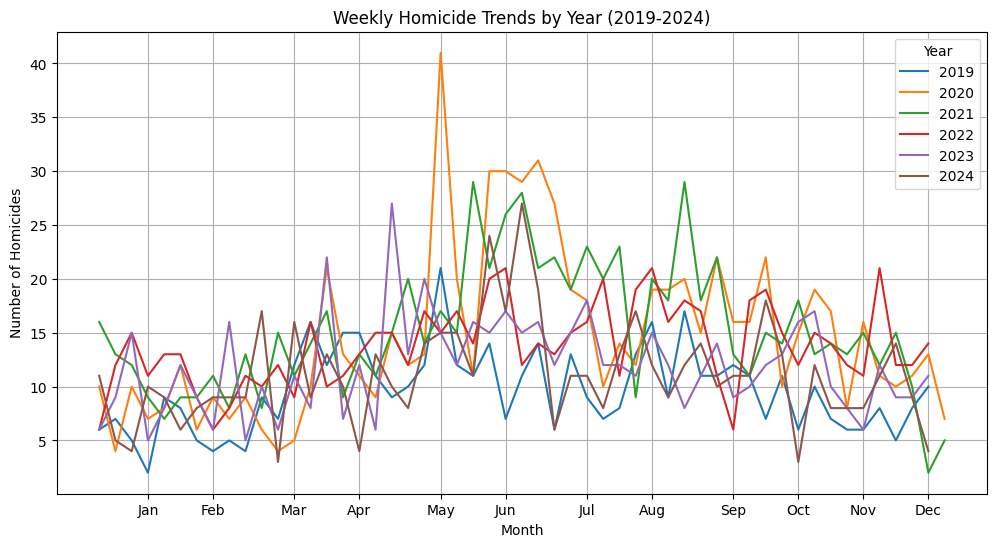

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "Shootings.csv"  # Update if needed
df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=False)

# Extract year and week number
df['Year'] = df['DATE'].dt.year
df['Week_Number'] = df['DATE'].dt.isocalendar().week  # Get the week number of the year

# Filter only years 2019-2024
df_filtered = df[df['Year'].between(2019, 2024)]

# Filter only homicide cases
df_homicide = df_filtered[df_filtered['VICTIMIZATION_PRIMARY'].str.contains("HOMICIDE", na=False, case=False)]

# Group homicides by week and year separately
df_homicide['Week_Start'] = df_homicide['DATE'].dt.to_period('W').apply(lambda r: r.start_time)

# Count homicides per week for each year separately
homicide_counts_weekly = df_homicide.groupby(['Year', 'Week_Number']).size().unstack(level=0)

# Plot the weekly homicide trend graph
plt.figure(figsize=(12, 6))

for year in homicide_counts_weekly.columns:
    plt.plot(homicide_counts_weekly.index, homicide_counts_weekly[year], label=str(year))

plt.xlabel("Month")
plt.ylabel("Number of Homicides")
plt.title("Weekly Homicide Trends by Year (2019-2024)")

# Set x-axis labels as months (weeks mapped to months)
plt.xticks(ticks=[4, 8, 13, 17, 22, 26, 31, 35, 40, 44, 48, 52],  # Approximate week numbers for each month
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title="Year")
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the CSV file
file_path = "Shootings.csv"  # Update if needed
df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=False)

# Extract year and week number
df['Year'] = df['DATE'].dt.year
df['Week_Number'] = df['DATE'].dt.isocalendar().week  # Get the week number of the year

# Filter only years 2019-2024
df_filtered = df[df['Year'].between(2019, 2024)]

# Filter only HOMICIDE and NON-FATAL SHOOTINGS cases
df_violent = df_filtered[df_filtered['VICTIMIZATION_PRIMARY'].str.contains("HOMICIDE|NON-FATAL", na=False, case=False)]

# Group by week and count victimizations per week for each year
violent_counts_weekly = df_violent.groupby(['Year', 'Week_Number']).size().unstack(level=0)

# Rolling average dropdown
rolling_avg_selector = widgets.Dropdown(
    options=[('1-day count', 1), ('7-day rolling average', 7), ('Monthly Average', 'monthly')],
    value=1,
    description="Rolling Avg:",
    style={'description_width': 'initial'}
)

# Function to update the graph based on selected rolling average
def update_graph(rolling_window):
    plt.figure(figsize=(12, 6))

    for year in violent_counts_weekly.columns:
        if rolling_window == 'monthly':  # Monthly aggregation
            df_violent['Month'] = df_violent['DATE'].dt.month
            monthly_counts = df_violent.groupby(['Year', 'Month']).size().unstack(level=0)
            smoothed_data = monthly_counts[year]
            x_axis = range(1, 13)  # Months (1-12)
        else:
            smoothed_data = violent_counts_weekly[year]
            if rolling_window > 1:
                smoothed_data = smoothed_data.rolling(int(rolling_window), center=True).mean()
            x_axis = violent_counts_weekly.index  # Weekly basis

        plt.plot(x_axis, smoothed_data, label=str(year))

    plt.xlabel("Month" if rolling_window == "monthly" else "Week Number")
    plt.ylabel("Number of Victimizations")
    plt.title(f"Trends of Homicide & Non-Fatal Shootings (2019-2024) - {rolling_window} Rolling Average")
    
    # Set x-axis labels based on time frame
    if rolling_window == "monthly":
        plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    else:
        plt.xticks(ticks=[4, 8, 13, 17, 22, 26, 31, 35, 40, 44, 48, 52],  # Approximate week numbers for months
                   labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.legend(title="Year")
    plt.grid(True)
    plt.show()

# Display interactive widget
widgets.interactive(update_graph, rolling_window=rolling_avg_selector)



C:\Users\Kevin\AppData\Local\Temp\ipykernel_58112\3791794290.py:8: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=False)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_58112\3791794290.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=False)


interactive(children=(Dropdown(description='Rolling Avg:', options=(('1-day count', 1), ('7-day rolling averag…

C:\Users\Kevin\AppData\Local\Temp\ipykernel_58112\538770869.py:8: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=False)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_58112\538770869.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=False)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_58112\538770869.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_violent['COMMUNITY_AREA'] = df_violent['COMMUNITY_AREA'].astype(str)


interactive(children=(Dropdown(description='Rolling Avg:', options=(('1-day count', 1), ('7-day rolling averag…

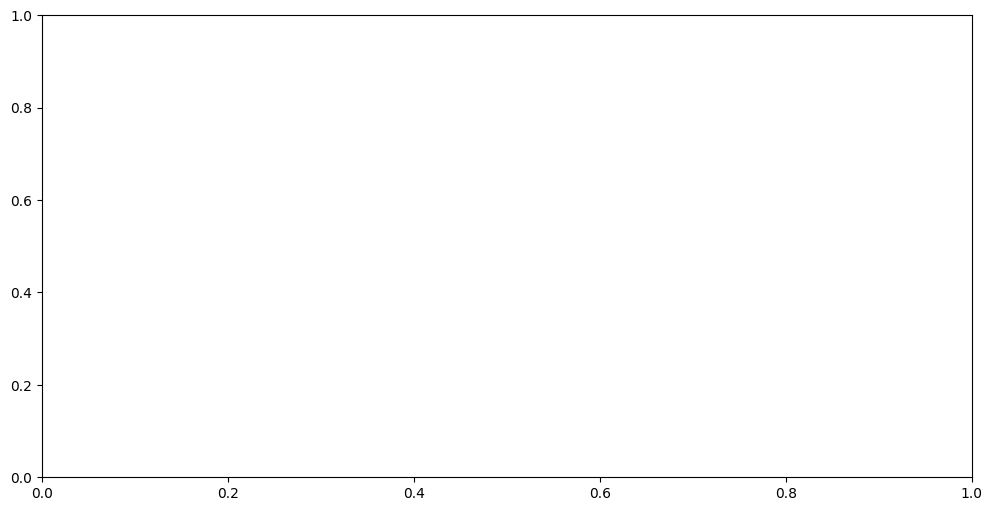

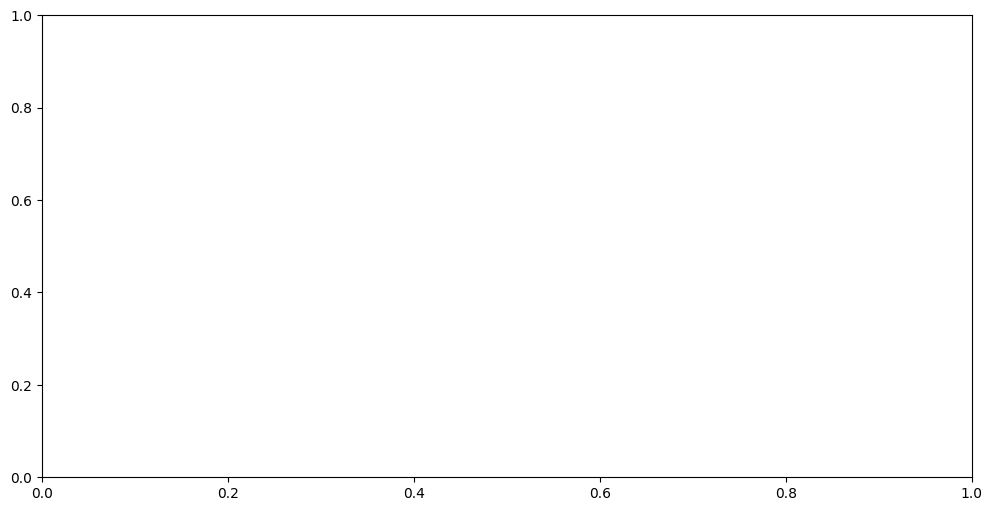

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the CSV file
file_path = "Shootings.csv"  # Update if needed
df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=False)

# Extract year and week number
df['Year'] = df['DATE'].dt.year
df['Week_Number'] = df['DATE'].dt.isocalendar().week  # Get the week number of the year

# Filter only years 2019-2024
df_filtered = df[df['Year'].between(2019, 2024)]

# Filter only HOMICIDE and NON-FATAL SHOOTINGS cases
df_violent = df_filtered[df_filtered['VICTIMIZATION_PRIMARY'].str.contains("HOMICIDE|NON-FATAL", na=False, case=False)]

# Ensure COMMUNITY_AREA is treated as a string for filtering
df_violent['COMMUNITY_AREA'] = df_violent['COMMUNITY_AREA'].astype(str)

# Get unique community areas for selection
unique_areas = sorted(df_violent['COMMUNITY_AREA'].dropna().unique())

# Community area dropdown selector
community_area_selector = widgets.Dropdown(
    options=['All'] + unique_areas,
    value='All',
    description="Community Area:",
    style={'description_width': 'initial'}
)

# Rolling average dropdown selector
rolling_avg_selector = widgets.Dropdown(
    options=[('1-day count', 1), ('7-day rolling average', 7), ('Monthly Average', 'monthly')],
    value=1,
    description="Rolling Avg:",
    style={'description_width': 'initial'}
)

# Function to update the graph based on selected community area and rolling average
def update_graph(rolling_window, community_area):
    plt.figure(figsize=(12, 6))

    # Filter data by selected community area
    if community_area != 'All':
        df_area = df_violent[df_violent['COMMUNITY_AREA'] == community_area]
    else:
        df_area = df_violent

    # Group by week and count victimizations per week for each year
    victimization_counts_weekly = df_area.groupby(['Year', 'Week_Number']).size().unstack(level=0)

    for year in victimization_counts_weekly.columns:
        if rolling_window == 'monthly':  # Monthly aggregation
            df_area['Month'] = df_area['DATE'].dt.month
            monthly_counts = df_area.groupby(['Year', 'Month']).size().unstack(level=0)
            smoothed_data = monthly_counts[year]
            x_axis = range(1, 13)  # Months (1-12)
        else:
            smoothed_data = victimization_counts_weekly[year]
            if rolling_window > 1:
                smoothed_data = smoothed_data.rolling(int(rolling_window), center=True).mean()
            x_axis = victimization_counts_weekly.index  # Weekly basis

        plt.plot(x_axis, smoothed_data, label=str(year))

    plt.xlabel("Month" if rolling_window == "monthly" else "Week Number")
    plt.ylabel("Number of Victimizations")
    title = f"Homicide & Non-Fatal Shootings Trends (2019-2024) - {rolling_window} Rolling Average"
    if community_area != 'All':
        title += f"\nCommunity Area: {community_area}"
    plt.title(title)
    
    # Set x-axis labels based on time frame
    if rolling_window == "monthly":
        plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    else:
        plt.xticks(ticks=[4, 8, 13, 17, 22, 26, 31, 35, 40, 44, 48, 52],  # Approximate week numbers for months
                   labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.legend(title="Year")
    plt.grid(True)
    plt.show()

# Display interactive widgets
widgets.interactive(update_graph, rolling_window=rolling_avg_selector, community_area=community_area_selector)
